Автор: Лейман М.А.   
Дата создания: 22.03.2025  

# Задание ZALA  
## 4. Детектирование множества объектов
### Модель __YOLO11s__ 

## Импорты

In [1]:
import time
from glob import glob
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





import warnings
warnings.filterwarnings("ignore")


print('Виртуальное окружение')
!which python 
# Текущее положение
print('\nТекущее положение: ')
path_1 = os.getcwd()
print(path_1)

Виртуальное окружение
/home/maksim/anaconda3/envs/rapids-25.02/bin/python

Текущее положение: 
/home/maksim/develops/python/devsTraining/zala_task


In [2]:

import warnings
from IPython.display import clear_output
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, Dataset
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
from typing import cast
import pandas as pd
from torch.optim import lr_scheduler
from torch import Tensor
import torch.nn as nn
#from tqdm.autonotebook import tqdm
from tqdm import tqdm_notebook
import torch.nn.functional as F
from torchvision import models
import copy
import torch.optim as optim
import time
from torchsummary import summary  # для вывода информации о модели
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from matplotlib import rcParams
from skimage import img_as_ubyte
import random


import torch

from PIL import Image






#from tqdm.notebook import tqdm
from tqdm import tqdm

from torch.utils.data.sampler import SubsetRandomSampler  
from torchsummary import summary


from PIL import Image
import imageio

sns.set_style('darkgrid')

warnings.filterwarnings("ignore")
# np.random.seed(42)
#set_global_seed(42)
rcParams['figure.figsize'] = (14,6)

## Проверка GPU

In [3]:
# устанавливаем device если gpu или cpu


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("работаем на устройстве: ", device)
print('Версия torch:           ', torch.__version__)
print("версия  cuDNN:          ", torch.backends.cudnn.version())

# ПРОВЕРКА GPU
!nvidia-smi

работаем на устройстве:  cuda
Версия torch:            2.6.0+cu124
версия  cuDNN:           90100
Sun Apr  6 18:28:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        Off |   00000000:01:00.0  On |                  N/A |
|  0%   55C    P8             24W /  170W |    1173MiB /  12288MiB |     40%      Default |
|                                         

In [4]:
# Получаем текущую директорию
path_dir = os.getcwd()
print("Текущая директория:", path_dir)

DATA_DIR = os.path.abspath(os.path.join(path_dir, 'dataset'))
print("Путь к dataset:", DATA_DIR)


Текущая директория: /home/maksim/develops/python/devsTraining/zala_task
Путь к dataset: /home/maksim/develops/python/devsTraining/zala_task/dataset


## Обучение

### Yolo

In [5]:
import time
from glob import glob
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
from IPython.display import clear_output
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, Dataset
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
from typing import cast
import pandas as pd
from torch.optim import lr_scheduler
from torch import Tensor
import torch.nn as nn
#from tqdm.autonotebook import tqdm
from tqdm import tqdm_notebook
import torch.nn.functional as F
from torchvision import models
import copy
import torch.optim as optim
import time
from torchsummary import summary  # для вывода информации о модели
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from matplotlib import rcParams
from skimage import img_as_ubyte
import random

#from tqdm.notebook import tqdm
from tqdm import tqdm

from torch.utils.data.sampler import SubsetRandomSampler  
from torchsummary import summary


from PIL import Image
import imageio

sns.set_style('darkgrid')

warnings.filterwarnings("ignore")
# np.random.seed(42)
#set_global_seed(42)
rcParams['figure.figsize'] = (14,6)

In [6]:
from ultralytics import YOLO
model = YOLO("models/yolo11s.pt")
# model = YOLO("models/yolov8s.pt")  
# model = YOLO("models/11s_best_UAVOD.pt")
model.half();


In [7]:
# ['auto', 'Adam', 'SGD', 'AdamW', 'Adamax', 'NAdam', 'RAdam']

import os
import time
from IPython.display import clear_output  
import torch
torch.cuda.empty_cache()

for opt in ['AdamW']:
    for mosaic in [False]:
        for lr00 in [0.0001]:
            for iou0 in [0.5]:
                for batch in [8]:
                    # Очистка экрана перед каждой новой тренировкой
                    os.system('cls' if os.name == 'nt' else 'clear')  # Для терминала
                    clear_output(wait=True)  

                    print(f"Запуск тренировки: opt={opt}, batch={batch}, mosaic={mosaic}, lr0={lr00}, iou={iou0}")
                    
                    model.train(
                        data="data_1.yaml",
                        epochs=100,
                        imgsz=512,
                        batch=batch,
                        device="cuda",
                        lr0=lr00,
                        lrf=0.1,
                        momentum=0.951,
                        weight_decay=0.0005,
                        optimizer=opt,
                        cache=None,
                        mosaic=mosaic,
                        single_cls=False,
                        patience=20,
                        verbose=True,
                        freeze=1,
                        iou=iou0,  
                        half=True,
                        workers=0,
                        multi_scale=True,
                        val=True,
                        plots=True,
                        amp= True,     # Смешанная точность
                        fraction=1.0,  # используемая доля обучающих данных


                        
                        
                    )

                    time.sleep(1)  # Небольшая задержка, чтобы увидеть обновление


Запуск тренировки: opt=AdamW, batch=8, mosaic=False, lr0=0.0001, iou=0.5
New https://pypi.org/project/ultralytics/8.3.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
engine/trainer: task=detect, mode=train, model=models/yolo11s.pt, data=data_1.yaml, epochs=100, time=None, patience=20, batch=8, imgsz=512, save=True, save_period=-1, cache=None, device=cuda, workers=0, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=1, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

train: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset_UAVOD/dataset_full/labels/train... 12941 images, 306 backgrounds, 0 corrupt: 100%|██████████| 12941/12941 [00:03<00:00, 3858.94it/s]


train: New cache created: /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset_UAVOD/dataset_full/labels/train.cache


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset_UAVOD/dataset_full/labels/val.cache... 1638 images, 145 backgrounds, 0 corrupt: 100%|██████████| 1638/1638 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: AdamW(lr=0.0001, momentum=0.951) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.36G      2.113      2.417      1.238        139        256:   8%|▊         | 125/1618 [00:27<05:29,  4.53it/s]


KeyboardInterrupt: 

### Первая итерация обучения 




### Графики



## Первая итерация обучения 
### На начальном датасете  __UAVOD__  844 изображения.

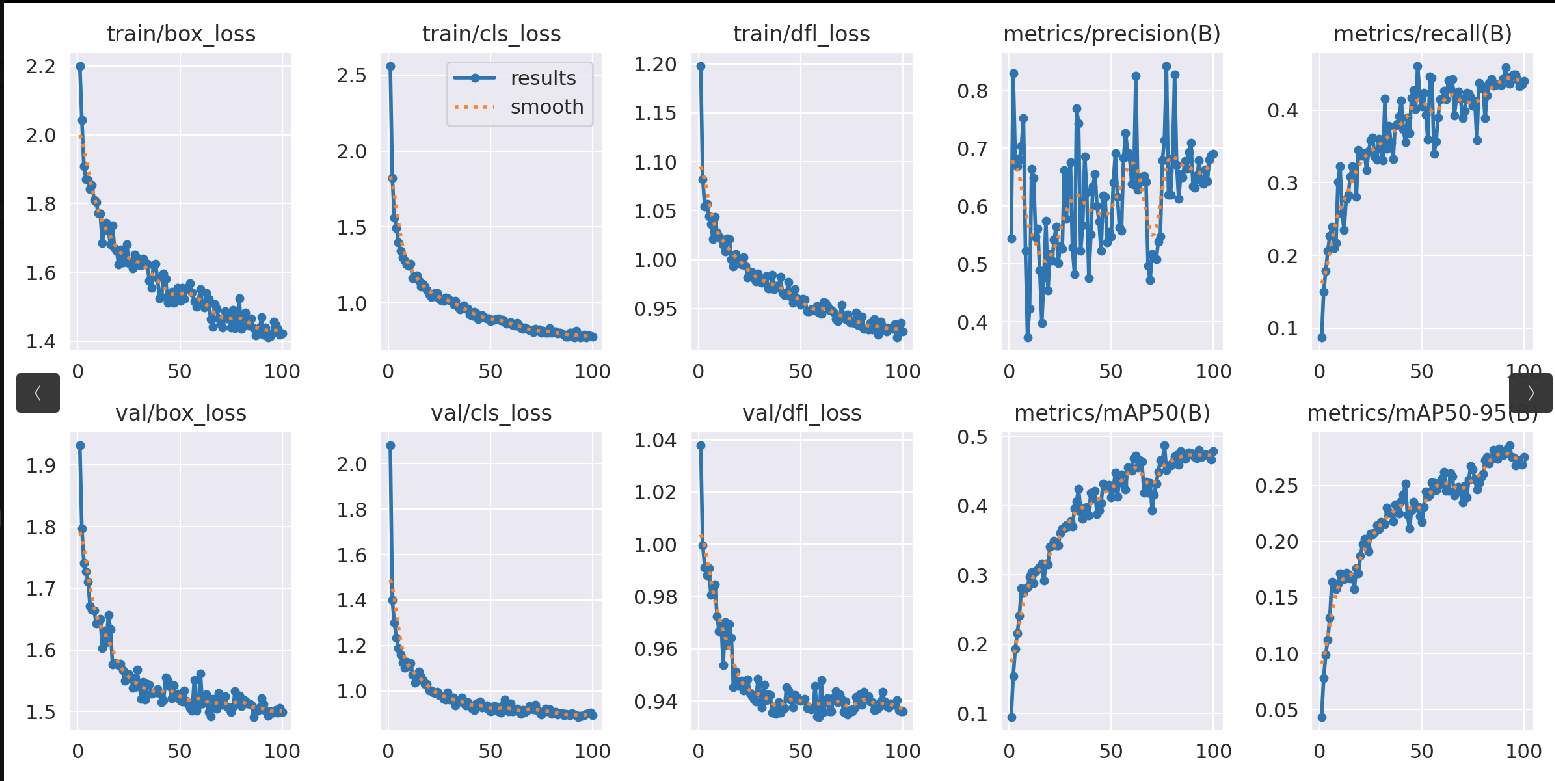

### На увеличенном датасете  __UAVOD__  12000 изображений.  


In [14]:
def metrics_model(model, split="test", iou=0.5):
    metrics = model.val(data="data_1.yaml", split=split, iou=iou)
    precision = metrics.box.p.mean().item()  # Precision
    recall = metrics.box.r.mean().item()  # Recall
    map50 = metrics.box.map50.mean().item()  # AP50 (IoU=0.5)
    map50_95 = metrics.box.maps.mean().item()  # mAP50-95

    # Выводим итоговые метрики
    print("\n=== Итоговые метрики по тестовому набору ===")
    print(f"Средняя точность (Precision): {precision:.3f}")
    print(f"Средняя полнота (Recall): {recall:.3f}")
    print(f"Средняя AP50 (IoU={iou:.2f}): {map50:.3f}")
    print(f"Средний mAP50-95: {map50_95:.3f}")

In [15]:
metrics_model(model, split="test", iou=0.5)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
YOLO11s summary (fused): 100 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset_UAVOD/datasets_split/labels/test.cache... 1183 images, 78 backgrounds, 0 corrupt: 100%|██████████| 1183/1183 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 148/148 [00:27<00:00,  5.33it/s]


                   all       1183      28064      0.537      0.356      0.391      0.203
              building        908      20072      0.631      0.664      0.647      0.319
 cultivation-mesh-cage         55        120      0.573      0.593      0.607      0.432
             landslide         25         64      0.193      0.109     0.0832     0.0319
                  pool        104        104          1      0.381       0.64      0.327
   prefabricated-house        571       2274       0.76      0.696       0.74      0.416
                quarry         69         82      0.326      0.232       0.17     0.0746
                  ship        260       3886      0.627      0.312      0.368      0.121
               vehicle        195        698      0.226   0.000972     0.0303     0.0134
                  well        316        764      0.501      0.221      0.236     0.0887
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect

### Итоги обучения. Метрики на тестовом наборе.



=== Итоговые метрики по тестовому набору UAVOD __начальный dataset__ ===    100 Эпох.  
Средняя точность (Precision): 0.537  
Средняя полнота (Recall): 0.356  
Средняя AP50 (IoU=0.50): 0.391  
Средний mAP50-95: 0.203  


=== Итоговые метрики на full_dataset ===  
Средняя точность (Precision): 0.787  
Средняя полнота (Recall): 0.609  
Средняя AP50 (IoU=0.50): 0.648  
Средний mAP50-95: 0.453  





In [10]:
metrics_model(model, split="test", iou=0.5)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
YOLO11s summary (fused): 100 layers, 9,418,992 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset2/dataset_full2/labels/test.cache... 187 images, 0 backgrounds, 0 corrupt: 100%|██████████| 187/187 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.73it/s]


                   all        187      27649      0.691      0.349      0.382      0.223
                 plane         29       1461      0.806      0.554      0.594      0.291
                  ship         53       2489      0.777       0.45      0.509      0.227
          storage-tank         23        142      0.773      0.192      0.226      0.136
      baseball-diamond         21         71      0.875      0.465      0.516      0.301
          tennis-court         45        386      0.913      0.821      0.856      0.718
      basketball-court         14         52      0.774      0.385      0.509      0.339
    ground-track-field         28         53      0.676      0.355      0.358      0.226
                harbor         45        610      0.724      0.661      0.705      0.327
                bridge         25        163      0.465     0.0481     0.0512      0.019
         large-vehicle         68       2911       0.69      0.482      0.516      0.326
         small-vehicl

In [9]:
metrics_model(model, split="test", iou=0.5)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
YOLO11s summary (fused): 100 layers, 9,418,992 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset2/dataset_full2/labels/test... 187 images, 0 backgrounds, 0 corrupt: 100%|██████████| 187/187 [00:00<00:00, 2333.71it/s]

val: New cache created: /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset2/dataset_full2/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.69it/s]


                   all        187      27649      0.688      0.334      0.366       0.21
                 plane         29       1461       0.81      0.514      0.553      0.259
                  ship         53       2489      0.783       0.43      0.488      0.209
          storage-tank         23        142      0.811      0.211      0.237      0.134
      baseball-diamond         21         71      0.841      0.437      0.483      0.289
          tennis-court         45        386      0.912      0.793      0.837      0.681
      basketball-court         14         52      0.912        0.4      0.497      0.347
    ground-track-field         28         53      0.614       0.34       0.36       0.21
                harbor         45        610      0.688      0.657      0.683      0.301
                bridge         25        163      0.449     0.0368       0.04     0.0136
         large-vehicle         68       2911      0.667      0.465      0.498      0.308
         small-vehicl

In [11]:
metrics_model(model, split="test", iou=0.4)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset2/dataset_full4/labels/test.cache... 5971 images, 3271 backgrounds, 0 corrupt: 100%|██████████| 5971/5971 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2986/2986 [00:39<00:00, 75.43it/s]


                   all       5971      48397      0.642      0.438      0.438      0.247
                 plane        425       2361      0.886      0.713      0.778      0.467
                  ship        522       7724      0.787       0.74      0.775      0.452
          storage-tank        157       1375      0.682      0.296      0.362      0.193
      baseball-diamond         78        123      0.349      0.333       0.25      0.127
          tennis-court        168        640      0.858      0.877      0.908       0.75
      basketball-court         50        152      0.558      0.374      0.417      0.265
    ground-track-field         75         93      0.169      0.419      0.218      0.127
                harbor        370       1474      0.678      0.598      0.644      0.272
                bridge        218        482      0.488      0.298       0.28      0.104
         large-vehicle        571       5219      0.689      0.469      0.533      0.339
         small-vehicl

In [12]:
metrics_model(model, split="test", iou=0.6)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset2/dataset_full4/labels/test.cache... 5971 images, 3271 backgrounds, 0 corrupt: 100%|██████████| 5971/5971 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2986/2986 [00:40<00:00, 74.65it/s]


                   all       5971      48397      0.622      0.434      0.427      0.245
                 plane        425       2361      0.828      0.705      0.742      0.447
                  ship        522       7724      0.766      0.742      0.771      0.451
          storage-tank        157       1375      0.696      0.279      0.358      0.193
      baseball-diamond         78        123      0.315      0.317      0.238      0.127
          tennis-court        168        640      0.871      0.875      0.907       0.75
      basketball-court         50        152      0.472      0.382      0.399      0.257
    ground-track-field         75         93      0.124      0.419      0.187      0.111
                harbor        370       1474      0.633      0.589      0.621      0.274
                bridge        218        482      0.469      0.293      0.278      0.105
         large-vehicle        571       5219      0.691      0.469       0.54      0.347
         small-vehicl

In [13]:
model.info()

YOLO11s summary (fused): 100 layers, 9,418,992 parameters, 0 gradients


(100, 9418992, 0, 0.0)